# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [18]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\denis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("News_API_key")


Python-dotenv could not parse statement starting at line 7


In [20]:
# Create a newsapi client
News_API_key = NewsApiClient(api_key=api_key)

In [21]:
# Fetch the Bitcoin news articles
bitcoin_news = News_API_key.get_everything(q="bitcoin", language="en")

bitcoin_news["totalResults"]

8225

In [22]:
# Fetch the Ethereum news articles
ethereum_news = News_API_key.get_everything(q="ethereum", language="en")

ethereum_news["totalResults"]

3931

In [35]:
# Create the Bitcoin sentiment scores DataFrame
# bitcoin_news_df = pd.DataFrame.from_dict(bitcoin_news["articles"])
# bitcoin_news_df.head()

In [24]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [34]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in bitcoin_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
bitcoin_news_df = pd.DataFrame.from_dict(sentiments)
bitcoin_news_df.head()

,text,Compound,Positive,Negative,Neutral
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000


In [36]:
# # Sentiment scores dictionaries
# title_sent = {
#     "title_compound": [],
#     "title_pos": [],
#     "title_neu": [],
#     "title_neg": [],
#     "title_sent": [],
# }
# description_sent = {
#     "description_compound": [],
#     "description_pos": [],
#     "description_neu": [],
#     "description_neg": [],
#     "description_sent": [],
# }

# # Get sentiment for the text and the title
# for index, row in bitcoin_news_df.iterrows():
#     try:
#         # Sentiment scoring with VADER
#         title_sentiment = analyzer.polarity_scores(row["title"])
#         title_sent["title_compound"].append(title_sentiment["compound"])
#         title_sent["title_pos"].append(title_sentiment["pos"])
#         title_sent["title_neu"].append(title_sentiment["neu"])
#         title_sent["title_neg"].append(title_sentiment["neg"])
#         title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

#         description_sentiment = analyzer.polarity_scores(row["description"])
#         description_sent["description_compound"].append(description_sentiment["compound"])
#         description_sent["description_pos"].append(description_sentiment["pos"])
#         description_sent["description_neu"].append(description_sentiment["neu"])
#         description_sent["description_neg"].append(description_sentiment["neg"])
#         description_sent["description_sent"].append(get_sentiment(description_sentiment["compound"]))
#     except AttributeError:
#         pass

# # Attaching sentiment columns to the News DataFrame
# title_sentiment_df = pd.DataFrame(title_sent)
# description_sentiment_df = pd.DataFrame(description_sent)
# bitcoin_news_df = pd.concat([bitcoin_news_df,title_sentiment_df, description_sentiment_df], axis=0)

# bitcoin_news_df.head()

In [37]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in ethereum_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
ethereum_news_df = pd.DataFrame.from_dict(sentiments)
ethereum_news_df.head()

,text,Compound,Positive,Negative,Neutral
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877


In [38]:
# # Create the Ethereum sentiment scores DataFrame
# ethereum_news_df = pd.DataFrame.from_dict(ethereum_news["articles"])
# ethereum_news_df.head()

In [10]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [39]:
# # Sentiment scores dictionaries
# title_sent = {
#     "title_compound": [],
#     "title_pos": [],
#     "title_neu": [],
#     "title_neg": [],
#     "title_sent": [],
# }
# description_sent = {
#     "description_compound": [],
#     "description_pos": [],
#     "description_neu": [],
#     "description_neg": [],
#     "description_sent": [],
# }

# # Get sentiment for the text and the title
# for index, row in ethereum_news_df.iterrows():
#     try:
#         # Sentiment scoring with VADER
#         title_sentiment = analyzer.polarity_scores(row["title"])
#         title_sent["title_compound"].append(title_sentiment["compound"])
#         title_sent["title_pos"].append(title_sentiment["pos"])
#         title_sent["title_neu"].append(title_sentiment["neu"])
#         title_sent["title_neg"].append(title_sentiment["neg"])
#         title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

#         description_sentiment = analyzer.polarity_scores(row["description"])
#         description_sent["description_compound"].append(description_sentiment["compound"])
#         description_sent["description_pos"].append(description_sentiment["pos"])
#         description_sent["description_neu"].append(description_sentiment["neu"])
#         description_sent["description_neg"].append(description_sentiment["neg"])
#         description_sent["description_sent"].append(get_sentiment(description_sentiment["compound"]))
#     except AttributeError:
#         pass

# # Attaching sentiment columns to the News DataFrame
# title_sentiment_df = pd.DataFrame(title_sent)
# description_sentiment_df = pd.DataFrame(description_sent)
# ethereum_news_df = pd.concat([ethereum_news_df,title_sentiment_df, description_sentiment_df], axis=0)

# ethereum_news_df.head()

In [112]:
# Describe the Bitcoin Sentiment
bitcoin_news_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.050560,0.062550,0.037900,0.899550
std,0.376771,0.061657,0.043444,0.063682
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.866250
50%,0.038600,0.054000,0.000000,0.914500
75%,0.328950,0.106750,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [113]:
# Describe the Ethereum Sentiment
ethereum_news_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.143115,0.062150,0.019000,0.918850
std,0.323765,0.065391,0.044849,0.081165
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.038600,0.048500,0.000000,0.931500
75%,0.406800,0.106000,0.000000,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean title positive score of 0.062550.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score at 0.143115.

Q. Which coin had the highest positive score?

A: Ethereum with a max positive score of 0.217000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
# Complete the tokenizer function
def tokenizer(description):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', description)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [43]:
# Create a list of stopwords
# sw = set(stopwords.words('english'))
# first_result = [word.lower() for word in words if word.lower() not in sw]
bitcoin_news_df["tokens"] = bitcoin_news_df.text.apply(tokenizer)

In [45]:
bitcoin_news_df.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."


In [46]:
# Create a new tokens column for Ethereum
ethereum_news_df["tokens"] = ethereum_news_df.text.apply(tokenizer)
ethereum_news_df.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hackers, made, roughly, million, ethereum, cr..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[trading, platform, cryptocom, lost, million, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [59]:
from collections import Counter
from nltk import ngrams

In [60]:
processed = tokenizer(bitcoin_news_df.text.str.cat())

In [61]:
# Generate the Bitcoin N-grams where N=2
word_counts = Counter(processed)
print(dict(word_counts))

bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{'denis': 1, 'rusinovich': 1, 'set': 2, 'cryptocurrency': 8, 'mining': 7, 'company': 9, 'maveric': 1, 'group': 1, 'kazakhstan': 1, 'thought': 1, 'hit': 1, 'jackpot': 1, 'next': 1, 'door': 1, 'china': 1, 'russia': 1, 'country': 1, 'everything': 1, 'bitcoin': 14, 'charsel': 1, 'salvador': 3, 'introduced': 1, 'legal': 2, 'tender': 1, 'alongside': 2, 'us': 3, 'dollar': 1, 'illustration': 2, 'alex': 3, 'castro': 3, 'verge': 1, 'international': 2, 'monetary': 3, 'funds': 1, 'executive': 1, 'board': 1, 'ha': 8, 'recommended': 1, 'el': 3, 'charswere': 1, 'officially': 2, 'building': 4, 'open': 5, 'systemphoto': 1, 'joe': 1, 'raedlegetty': 2, 'imagesblock': 2, 'payment': 3, 'formerly': 1, 'known': 1, 'square': 1, 'working': 1, 'system': 3, 'charsisraeli': 1, 'national': 1, 'tal': 1, 'prihar': 1, 'pled': 1, 'guilty': 1, 'routing': 1, 'money': 1, 'kickback': 1, 'shell': 1, 'vergein': 2, 'culmination': 1, 'twoyear': 1, 'process': 1, 'charsin': 1, 'new': 7, 'blog': 3, 'post': 3, 'said': 3, 'eth': 1

In [65]:
processed = tokenizer(ethereum_news_df.text.str.cat())

In [66]:
# Generate the Ethereum N-grams where N=2
word_counts_e = Counter(processed)
print(dict(word_counts_e))

bigram_counts_e = Counter(ngrams(processed, n=2))
print(dict(bigram_counts_e))

{'new': 6, 'blog': 3, 'post': 3, 'company': 5, 'said': 3, 'eth': 1, 'bitcoin': 4, 'takenillustration': 1, 'alex': 1, 'castro': 1, 'vergein': 1, 'published': 3, 'early': 2, 'hour': 1, 'thursday': 1, 'morning': 1, 'cryptocurrency': 9, 'charshackers': 1, 'made': 3, 'roughly': 1, 'million': 4, 'ethereum': 8, 'cryptocom': 2, 'attempting': 1, 'launder': 1, 'fund': 1, 'socalled': 1, 'mixer': 1, 'known': 2, 'tornado': 1, 'cash': 1, 'according': 2, 'report': 1, 'charson': 1, 'level': 1, 'mayor': 2, 'simply': 1, 'employing': 1, 'ageold': 1, 'political': 1, 'strategy': 1, 'making': 1, 'overture': 1, 'business': 1, 'community': 1, 'fintech': 1, 'growing': 2, 'field': 1, 'york': 2, 'city': 2, 'blockchainbased': 1, 'charsback': 1, 'september': 1, 'robinhood': 1, 'announced': 1, 'plan': 1, 'test': 1, 'wallet': 3, 'within': 1, 'app': 1, 'time': 1, 'would': 1, 'open': 3, 'beta': 1, 'small': 1, 'number': 1, 'people': 1, 'expanding': 1, 'availa': 1, 'charstrading': 1, 'platform': 2, 'lost': 1, 'worth': 3

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=2):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [68]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(bigram_counts.most_common(10)))

{('bitcoin', 'mining'): 4, ('alex', 'castro'): 3, ('building', 'open'): 3, ('open', 'bitcoin'): 3, ('mining', 'system'): 3, ('blog', 'post'): 3, ('alongside', 'us'): 2, ('illustration', 'alex'): 2, ('international', 'monetary'): 2, ('officially', 'building'): 2}


In [70]:
# Use token_count to get the top 10 words for Ethereum
print(dict(bigram_counts_e.most_common(10)))

{('blog', 'post'): 3, ('new', 'blog'): 2, ('post', 'company'): 2, ('company', 'said'): 2, ('according', 'new'): 2, ('york', 'city'): 2, ('charsto', 'believers'): 2, ('believers', 'open'): 2, ('open', 'public'): 2, ('public', 'blockchains'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

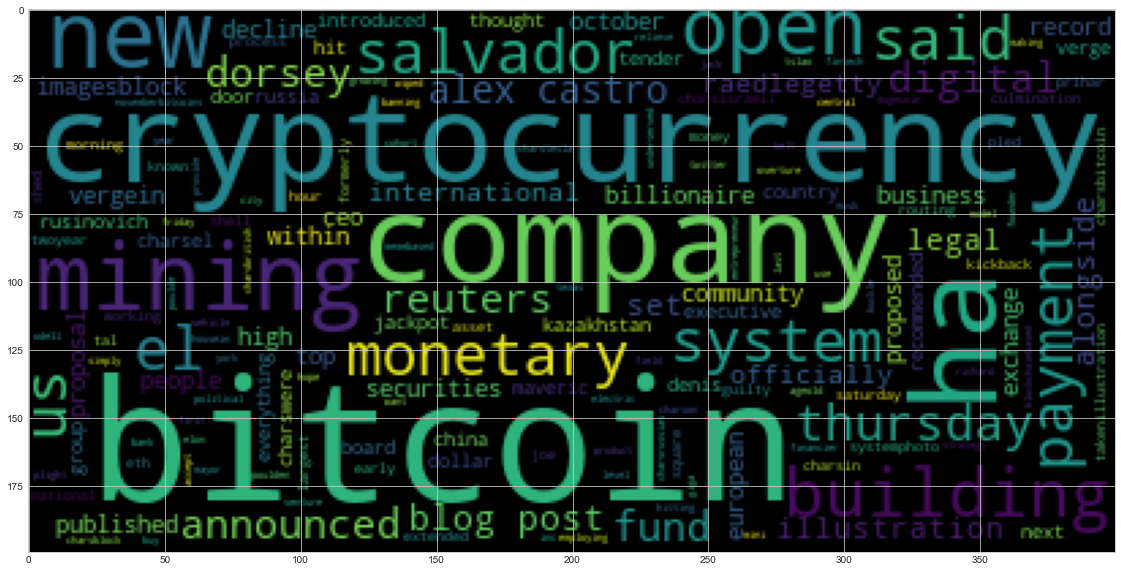

In [81]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(" ".join(tokenizer(bitcoin_news_df.text.str.cat())))
plt.imshow(wc);

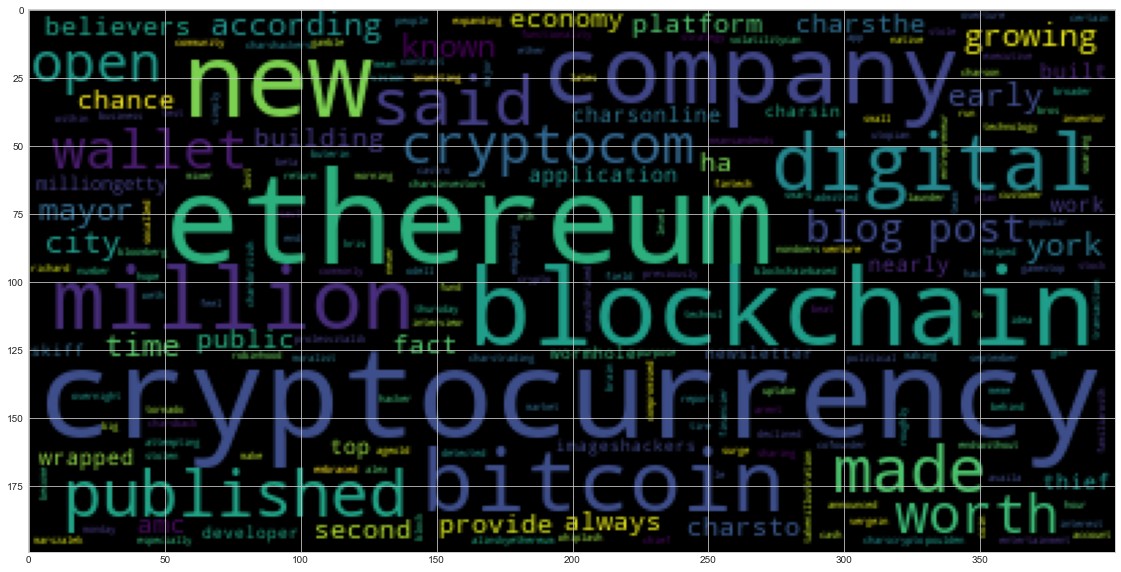

In [83]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(" ".join(tokenizer(ethereum_news_df.text.str.cat())))
plt.imshow(wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [85]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [86]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [87]:
# Concatenate all of the Bitcoin text together
ner_bc = " ".join(tokenizer(bitcoin_news_df.text.str.cat()))

document = nlp(ner_bc)

In [88]:
document

denis rusinovich set cryptocurrency mining company maveric group kazakhstan thought hit jackpot next door china russia country everything bitcoin charsel salvador introduced bitcoin legal tender alongside us dollar illustration alex castro verge international monetary funds executive board ha recommended el charswere officially building open bitcoin mining systemphoto joe raedlegetty imagesblock payment company formerly known square working building open bitcoin mining system charsisraeli national tal prihar pled guilty routing money kickback bitcoin shell company illustration alex castro vergein culmination twoyear legal process charsin new blog post company said eth bitcoin takenillustration alex castro vergein blog post published early hour thursday morning cryptocurrency charsbitcoin largest digital asset extended decline saturday ha shed record high novemberbitcoins decline since hitting record ha wiped charsblock founder jack dorsey ha announced twitter company officially buildin

In [89]:
# Run the NER processor on all of the text
document.user_data["title"] = "bitcoin_ner"

In [90]:
displacy.render(document, style='ent')

In [106]:
# List all Entities
for i in document.ents:
    print(i.text, i.label_)

denis NORP
china GPE
russia GPE
bitcoin GPE
us GPE
alex castro PERSON
el charswere PERSON
bitcoin GPE
joe PERSON
bitcoin GPE
money kickback bitcoin shell company ORG
alex castro vergein culmination PERSON
charsin new blog post company ORG
eth CARDINAL
bitcoin GPE
alex castro vergein blog post ORG
early hour TIME
thursday DATE
morning TIME
saturday DATE
jack dorsey PERSON
bitcoin GPE
digital payment provide charstesla inc tslao ORG
texas GPE
friday DATE
charson ORG
new york city GPE
richard odell poulden hope PERSON
bitcoin billionaire GPE
october DATE
thursday DATE
russian NORP
bitcoin GPE
el salvador GPE
dollarthe international monetary fund ORG
el salvador GPE
one CARDINAL
thursday DATE
bitcoin exchangetraded fund etf fidelitys ORG
bitcoin GPE
bitcoin GPE
cringey PERSON
crypto community ORG
week DATE
september DATE
app time company ORG
million CARDINAL
monday DATE
new blog post company ORG
overnight TIME
charsone european unions ORG
european NORP
reassert dominance PERSON
wa assailed

---

### Ethereum NER

In [107]:
# Concatenate all of the Ethereum text together
ner_et = " ".join(tokenizer(ethereum_news_df.text.str.cat()))
document_e = nlp(ner_et)

In [108]:
document_e

new blog post company said eth bitcoin takenillustration alex castro vergein blog post published early hour thursday morning cryptocurrency charshackers made roughly million ethereum cryptocom attempting launder fund socalled ethereum mixer known tornado cash according new report charson level new mayor simply employing ageold political strategy making overture business community fintech growing field new york city blockchainbased company charsback september robinhood announced plan test cryptocurrency wallet within app time company said would open beta small number people expanding availa charstrading platform cryptocom lost million worth cryptocurrency hack monday according new blog post company published overnight company previously declined charsthe meansandends moralist nondoers always end endswithout mean saul alinskyethereum digital platform run blockchain technology commonly known smart contract functionality native cryptocurrency ether broader purpose ethereum charsinvestors i

In [114]:
# Render the visualization
document_e.user_data["title"] = "ethereum_ner"
displacy.render(document_e, style='ent')

In [110]:
# List all Entities
for i in document_e.ents:
    print(i.text, i.label_)


new blog post company ORG
eth CARDINAL
bitcoin GPE
alex castro vergein blog post ORG
early hour TIME
thursday DATE
morning TIME
roughly million CARDINAL
fintech ORG
new york city GPE
september DATE
app time company ORG
million CARDINAL
monday DATE
new blog post company ORG
overnight TIME
moralist ORG
saul alinskyethereum digital ORG
functionality native ORG
cryptocurrency uptake ORG
utopian GPE
prolesvitalik buterin cofounder PERSON
familiarwith digital PERSON
second ORDINAL
second ORDINAL
million CARDINAL
charsin interview bloomberg tv ORG
kris marszalek PERSON
hacker ORG
richard odell poulden hope PERSON
bitcoin billionaire GPE
october DATE
bitcoin GPE
friday DATE
weekly DATE
york city GPE
eric adams PERSON
first ORDINAL
bitcoin ethereumcoinbase global inc ORG
early december DATE
keypair ORG


---